# Chapter 1: Data Acquisition
In this section, we connect to the raw Titanic dataset hosted on GitHub. To keep the project environment "light" and avoid local file management, we pull the data directly into memory using a public URL.

### Key Tools:
* **Pandas**: For data manipulation and analysis.
* **Seaborn/Matplotlib**: For statistical data visualization.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We use the direct URL instead of a local file path
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Look at the first 5 passengers
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Chapter 2: Data Integrity Check
Before performing any analysis, we must understand the "Vital Signs" of our dataset. We use `df.info()` to inspect the data types and, more importantly, to identify **Missing Values (Nulls)**.

### Observations to look for:
1. **Total Entries**: 891 passengers.
2. **Missing Ages**: The 'Age' column is incomplete and will require **Imputation** (filling in the gaps).
3. **Missing Cabin Info**: The 'Cabin' column is mostly empty and may need to be dropped.

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


> **Output Analysis:** > As seen in the summary above, the **Age** column has only 714 non-null values out of 891. 
> This indicates we have approximately **20% missing data** in the age category, which 
> we must address during the cleaning phase.

# Chapter 3: Exploratory Data Analysis (EDA)
In this phase, we look for visual evidence of "Survival Drivers." We want to see which features (like Gender or Social Class) have the strongest correlation with survival. 

### Why Visualize?
Machine Learning models are only as good as the patterns we provide. By plotting these relationships, we can confirm our intuition before building the model.

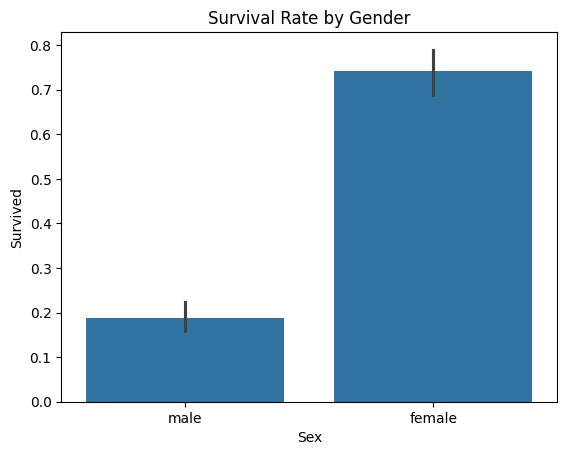

In [5]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')

plt.show()

### Survival Analysis by Age Group (Binning)

To better understand the relationship between age and survival, we have "binned" the continuous Age data into discrete life stages: Child, Teen, Young Adult, Adult, and Senior.

By grouping ages, we can more clearly observe the "Women and Children First" protocol in action.

Why we use Binning here:

    Noise Reduction: Individual ages (like 21 vs. 22) often have no statistical difference in survival. Binning smooths out this "noise."

    Pattern Recognition: It becomes immediately obvious if infants or the elderly were prioritized during the evacuation.

    Gap Management: This view helps us see how our "Imputed" (filled-in) ages fit into the broader distribution of the passenger manifest.

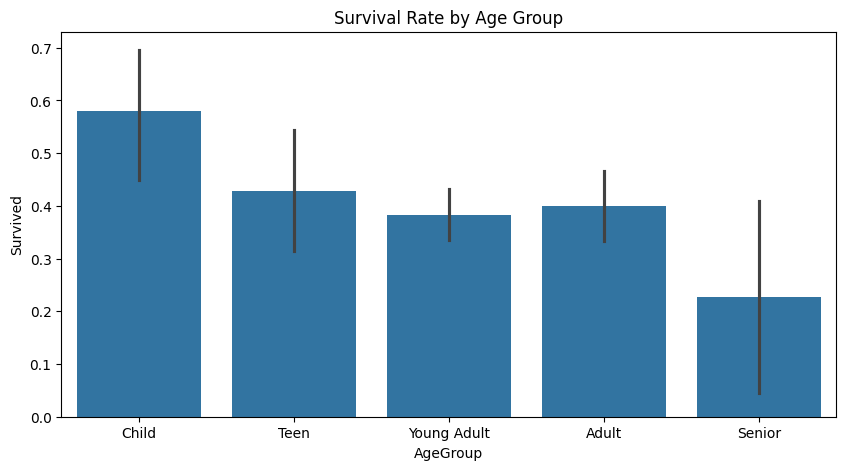

In [8]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(10, 5))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()
